In [2]:
import sys; print('Python %s on %s' % (sys.version, sys.platform))

Python 3.6.1 (default, Apr  4 2017, 09:40:21) 
[GCC 4.2.1 Compatible Apple LLVM 8.1.0 (clang-802.0.38)] on darwin


In [3]:
import os; os.path.dirname(os.path.realpath('__file__'))

'/Users/chunjy92/Documents/Research/Coalescent-Simulations/presentation'

In [4]:
sys.path.extend(['..'])

In [5]:
# imports
from IPython.display import display, Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from experiment.Experiment import Experiment
%matplotlib inline

In [6]:
!pip freeze

appnope==0.1.0
biopython==1.69
bleach==2.1.2
cycler==0.10.0
decorator==4.2.1
entrypoints==0.2.3
html5lib==1.0.1
ipykernel==4.8.2
ipython==6.2.1
ipython-genutils==0.2.0
jedi==0.11.1
Jinja2==2.10
jsonschema==2.6.0
jupyter-client==5.2.2
jupyter-core==4.4.0
MarkupSafe==1.0
matplotlib==2.0.2
mistune==0.8.3
nbconvert==5.3.1
nbformat==4.4.0
notebook==5.4.0
numpy==1.12.1
pandocfilters==1.4.2
parso==0.1.1
pexpect==4.4.0
pickleshare==0.7.4
prompt-toolkit==1.0.15
ptyprocess==0.5.2
Pygments==2.2.0
pyparsing==2.2.0
python-dateutil==2.6.0
pytz==2017.2
pyzmq==17.0.0
rise==5.2.0
scikit-learn==0.18.1
scipy==0.19.0
Send2Trash==1.5.0
simplegeneric==0.8.1
six==1.10.0
terminado==0.8.1
testpath==0.3.1
tornado==4.5.3
traitlets==4.3.2
wcwidth==0.1.7
webencodings==0.5.1
You are using pip version 9.0.1, however version 10.0.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


<center> <h1> Coalescent Simulation </h1> </center>
<br>
<center>![Coalescent Simulation Image](img/coalescent_simulation.jpg "http://christinabergey.com/blog/2013/04/coalescent-sim/")</center>
<p style="text-align: right">by Jayeol Chun</p>

In [16]:
from IPython.display import Image

<center> <h1> Coalescent Simulation </h1> </center>

In [17]:
Image(filename="img/coalescent_simulation.jpg ")

ValueError: Cannot embed the 'jpg ' image format

# Contents
1. What is Coalescent Theory?
2. Kingman & Bolthausen-Sznitman Coalescent Models
3. Coalescent Simulation
5. Sample Experiments
6. Current Status
7. References

# 1. What is Coalescent Theory?

<p style="text-align: center;font-size:40px">British Royal Family Tree</p>
<br>
<center>![British Royal Family Tree](img/british_royal_family_tree.jpg "https://www.pinterest.com/pin/446137906821819884/")</center>

Q: The Most Recent Common Ancestor?
<center>![British Royal Family Tree](img/british_royal_family_tree_edit.jpg )</center>

A: Prince Charles & Princess Diana
<center>![British Royal Family Tree](img/british_royal_family_tree_edit2.jpg)</center>

## Other questions include:
1. What is time to MRCA?
1. What is the population size at a given time?
2. How was population changing at a given time?
3. How will it change?

<p style="text-align: center;font-size:40px">Coalescent Theory</p>
<center>![Coalescnence](img/coalescnence.png)</center>
* Given the available gene pool, trace the flow of evolution back in time (generation units)
* Model of how gene variants sampled from a population may have originated from a common ancestor [1]

<p style="text-align: center;font-size:40px">Phylogenetic Tree</p>
* Tree showing the inferred evolutionary relationships among various biological species or other entities [2]
* Rooted phylogenetic tree: each node with descendants represents the inferred most recent common ancestor of the descendants [2]

<p style="text-align: center;font-size:40px">Coalescence</p>
<center>![Coalescnence](img/coalescnence_pointer.png)</center>
* Two or more lineages fuse into a single ancestor


* Missing one more pointer?

<p style="text-align: center;font-size:40px">Coalescent</p>
<center>![Coalescnence](img/coalescnence.png)</center>
* At certain points, coalescent events will merge two or more lineages into one
* This happens recursively, until we reach the last standing ancestor
* The resulting geneaology (or tree) is called the coalescent

Important Assumptions
1. No Natural Selection
2. No Recombination

# 2. Models of Interest

<p style="text-align: center;font-size:40px">a) Kingman Coalescent</p>
<center>![Coalescnence](img/k.png)</center>
* Only two children per ancestor

<p style="text-align: center;font-size:40px">b) Bolthausen-Sznitman Coalescent</p>
<center>![Coalescnence](img/bs.png)</center>
* two or more children per ancestor

Can you figure out which tree this is?
<center>![Coalescnence](img/test.png)</center>

Remarks:
* Kingman and Bolthausen-Sznitman Coalescents are two of dynamics that describe the behavior of coalescent events
* By studying these, we can gain insight into the mechanism of evolution within a given population
* But this is not all..

Here comes the mutation!
* Assumption: Mutations occur at a constant rate (μ) along the branch
* Mutations follow a Poisson process [3]
* So far, the weight of vertex was in terms of time
* Now, replace the weight with mutation!

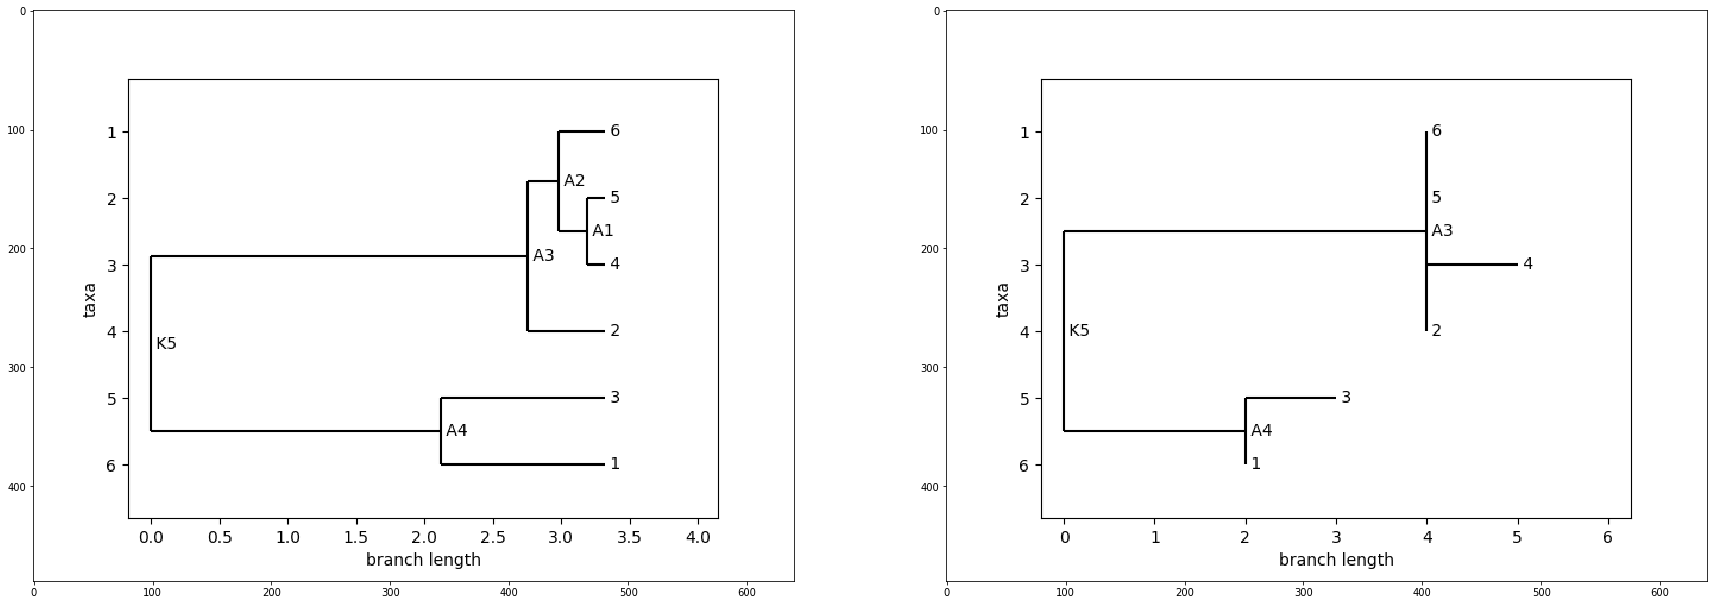

In [6]:
plt.figure(figsize=(30,20))
plt.subplot(1, 2, 1); plt.imshow(mpimg.imread('img/k_before.png'))
plt.subplot(1, 2, 2); plt.imshow(mpimg.imread('img/k_after.png'))
plt.show()

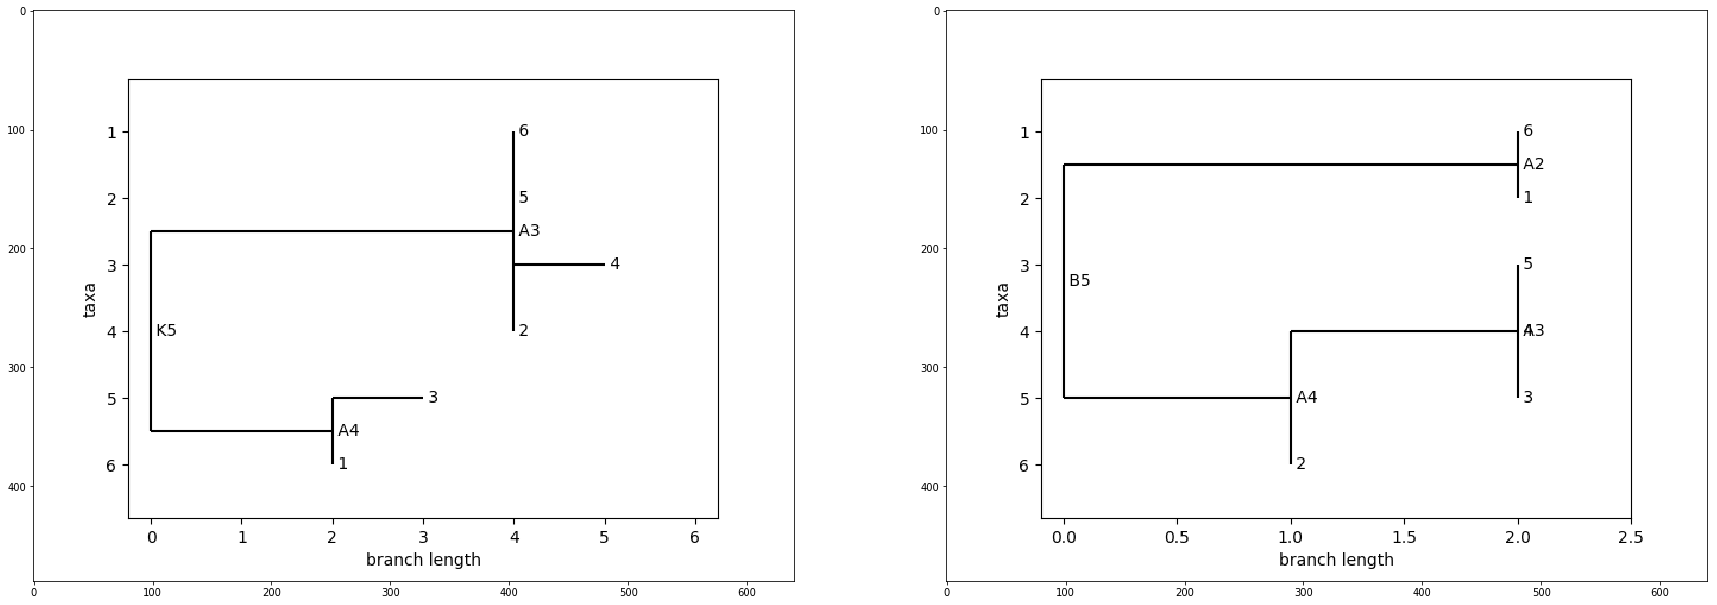

In [7]:
plt.figure(figsize=(30,20))
plt.subplot(1, 2, 1); plt.imshow(mpimg.imread('img/k_after.png'))
plt.subplot(1, 2, 2); plt.imshow(mpimg.imread('img/b_after.png'))
plt.show()

* Recall: Mutations occur at a constant rate (μ) along the branch
* Mutation rate (μ) is a parameter of simulation
* The higher the mutation rate, the more likely the non-zero mutation vertices, which means the tree will likely retain its original structure!
* The lower the mutation rate, the more likely the 0-mutation vertices, which makes it more difficult to distinguish between the two coalescents!

# 3. Coalescent Simulation

Objective
* Simulate many phylogenetic trees with mutation as weight of the vertex
* Main parameters: Sample Size and Mutation Rate
* Find tree features that help us identify the model (K or B) that generated the time tree, which is the basis of the mutation tree
* Insight into the dynamics that drive the coalescent events

Procedure
* Simulate Kingman and Bolthausen-Sznitman coalescents
* Apply mutation as a Poisson process
* Gather tree statistics as features
* Train SVM on gathered data and test its performance!

# 4. Sample Experiments

In [8]:
class MyObj(object):
    pass
obj = MyObj()

In [9]:
# 
sample_size = int(input("Input Sample Size to Test: "))
mutation_rate = float(input("Input Mutation Rate to Test: "))

Input Sample Size to Test: 100
Input Mutation Rate to Test: .3


In [10]:
setattr(obj, "sample_size", sample_size)
setattr(obj, "sample_size_end", sample_size+1)
setattr(obj, "sample_size_step", 2)
setattr(obj, "mutation_rate", mutation_rate)
setattr(obj, "mutation_rate_step", 1.)
setattr(obj, "num_iter", 1)
setattr(obj, "num_proc", 1)
setattr(obj, "verbose", False)

In [11]:
E = Experiment(obj)

[*] Initiating Experiment class..
[*] Begin Simulating..
[*] Done.


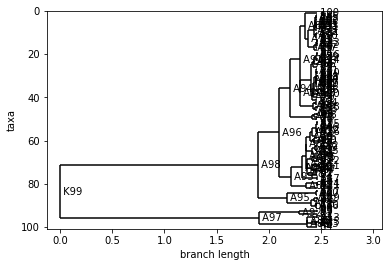

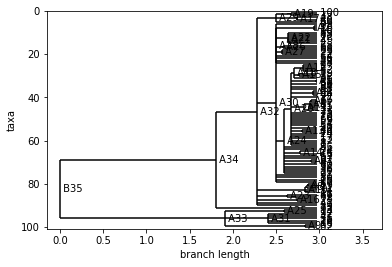

In [12]:
E.display_all_trees(time_mode=True)

In [15]:
E.apply_mutation()

[*] Applying Mutations..


# 5. Current Status

* Simulation done.
* Running toy examples to identify distinguishing tree features

Tree Features
1. Bottom Branch Length
2. Tree Asymmetry [4]
    * Sackin's Index: Total topological distance between leaves and root
    * Cherries: Number of ancestors with only leaves as its direct descendants
    * Note: [4] only deals with binary trees

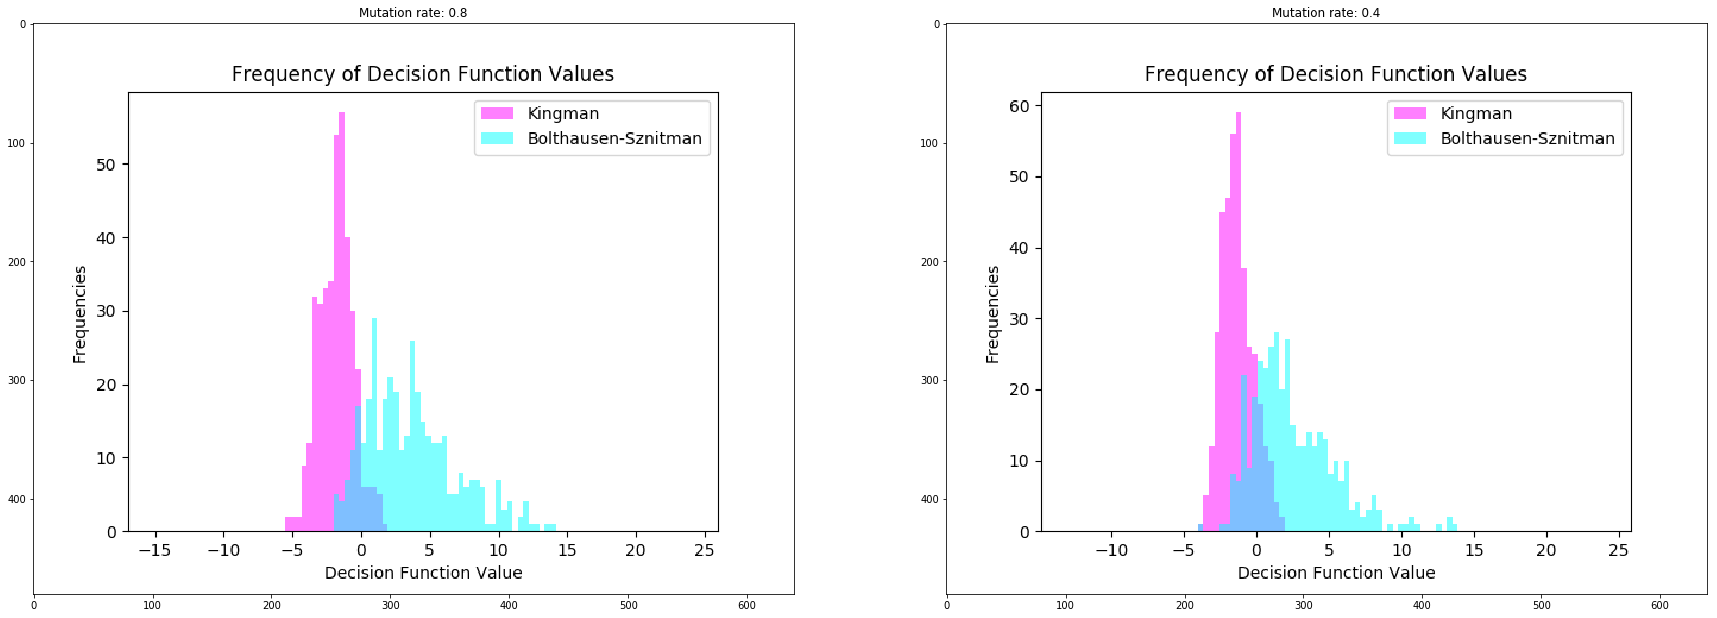

In [14]:
plt.figure(figsize=(30,20)) # Sample Size: range(6, 100, 5); Num Iter: 100
plt.subplot(1, 2, 1); plt.imshow(mpimg.imread('img/8.png')); plt.title("Mutation rate: 0.8")
plt.subplot(1, 2, 2); plt.imshow(mpimg.imread('img/4.png')); plt.title("Mutation rate: 0.4")
plt.show()

# 6. References

## Image References
In the order of appearance
1. [Coalescent Simulation](http://christinabergey.com/blog/2013/04/coalescent-sim/)
    * Related post: [Coaltrace](http://bedford.io/projects/coaltrace/)
2. Pinterest: [The British Royal Family Tree](https://www.pinterest.com/pin/446137906821819884/)

Phylogenetic figures generated by [this code](https://github.com/weissmanlab/Coalescent-Simulations), to be updated soon. 

## Cited References
1. Wiki: [Coalescent Theory](https://en.wikipedia.org/wiki/Coalescent_theory)
2. Wiki: [Phylogenetic Tree](https://en.wikipedia.org/wiki/Phylogenetic_tree)
3. [Why does the number of mutations per individuals follow a Poisson distribution?](https://biology.stackexchange.com/questions/36497/why-does-the-number-of-mutations-per-individuals-follow-a-poisson-distribution)
4. [Measuring Asymmetry in Time-Stamped Phylogenies](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1004312) B. L. Dearlove and S. D. W. Frost, 2015